In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [5]:
df=pd.read_csv("canada_per_capita_income.csv")

In [6]:
df.head(3)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484


In [7]:
df.columns

Index(['year', 'per capita income (US$)'], dtype='object')

Text(0, 0.5, 'Income Per Capita')

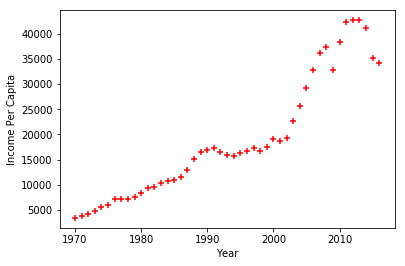

In [8]:
plt.scatter(df['year'],df['per capita income (US$)'],marker="+",color="Red")
plt.xlabel("Year")
plt.ylabel("Income Per Capita")

In [9]:
lreg=linear_model.LinearRegression()

In [10]:
lreg.fit(X=df[['year']],y=df['per capita income (US$)'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
lreg.intercept_

-1632210.7578554575

In [12]:
lreg.coef_


array([828.46507522])

In [13]:
lreg.predict([[1972]])

array([1522.37048373])

In [14]:
pd_new=pd.read_csv("pred.csv")

In [15]:
len(pd_new)

47

In [16]:
list1=[]
for i in range(0,len(pd_new)):
    list1.append(lreg.predict([[pd_new['year'][i]]]))
list1

[array([-134.55966672]),
 array([693.9054085]),
 array([1522.37048373]),
 array([2350.83555895]),
 array([3179.30063417]),
 array([4007.7657094]),
 array([4836.23078462]),
 array([5664.69585984]),
 array([6493.16093506]),
 array([7321.62601029]),
 array([8150.09108551]),
 array([8978.55616073]),
 array([9807.02123595]),
 array([10635.48631118]),
 array([11463.9513864]),
 array([12292.41646162]),
 array([13120.88153685]),
 array([13949.34661207]),
 array([14777.81168729]),
 array([15606.27676251]),
 array([16434.74183774]),
 array([17263.20691296]),
 array([18091.67198818]),
 array([18920.1370634]),
 array([19748.60213863]),
 array([20577.06721385]),
 array([21405.53228907]),
 array([22233.9973643]),
 array([23062.46243952]),
 array([23890.92751474]),
 array([24719.39258996]),
 array([25547.85766519]),
 array([26376.32274041]),
 array([27204.78781563]),
 array([28033.25289085]),
 array([28861.71796608]),
 array([29690.1830413]),
 array([30518.64811652]),
 array([31347.11319175]),
 array

In [17]:
pd_new['capiata']=list1

# Home price Basic Csv

In [18]:
df=pd.read_csv("homeprices.csv")

In [19]:
df.head()


,area,price
0,2600,550000$
1,3000sqft,5650$00
2,3200,610000
3,3600,680000
4,4000,725000


In [20]:
new_df=df.replace(to_replace='[A-Z a-z$]',value='',regex=True)
new_df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [21]:
model=linear_model.LinearRegression()

In [22]:
model.fit(X=new_df[['area']],y=new_df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
model.predict([[5000]])

array([859554.79452055])

In [24]:
model.intercept_

180616.43835616432

In [25]:
model.coef_

array([135.78767123])

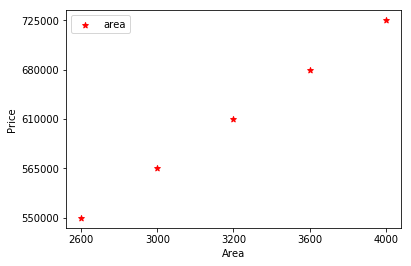

In [26]:
plt.scatter(new_df['area'],new_df['price'],color="Red",marker="*")
           
plt.xlabel("Area")
plt.ylabel('Price')
plt.legend(labels=['area'])

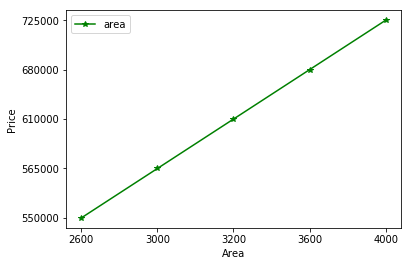

In [27]:
%matplotlib inline
plt.plot(new_df['area'],new_df['price'],color="Green",marker='*')
plt.xlabel("Area")
plt.ylabel('Price')
plt.legend(labels=['area'])
plt.show()

In [28]:
len(new_df)               

5

In [29]:
model.predict([[5000]])

array([859554.79452055])

In [30]:
# Issue with float conversion 
list1=[]
for i in range(0,len(new_df)):
    list1.append(model.predict([[new_df['area'][i]]])).astype(int)
list


C:\Users\Milind\Anaconda3\lib\site-packages\sklearn\utils\validation.py:563: FutureWarning: Beginning in version 0.22, arrays of bytes/strings will be converted to decimal numbers if dtype='numeric'. It is recommended that you convert the array to a float dtype before using it in scikit-learn, for example by using your_array = your_array.astype(np.float64).
  FutureWarning)


TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

In [ ]:
df1=pd.read_csv('areas.csv')

In [ ]:
df1

In [ ]:
model.predict([df1])

In [ ]:
list1=[]
list2=[]
for i in range(0,len(df1)):
    list1.append(model.predict([[df1['area'][i]]]))
df1['price']=list1


In [ ]:
df1.to_csv('new_area.csv',index=False)

In [ ]:
new=pd.read_csv('new_area.csv')
new['price'].str.strip('[]')
type(new)

In [ ]:
import pickle as pk

In [32]:
with open("model_pickle","wb") as f:
    fp=  pickle.dump(lreg,f)